In [1]:
from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(style="whitegrid")

### Boxplot non-hue

#### Multiple comparisons

By default, no multiple comparisons correction is applied.

In [2]:
df = sns.load_dataset("tips")

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02


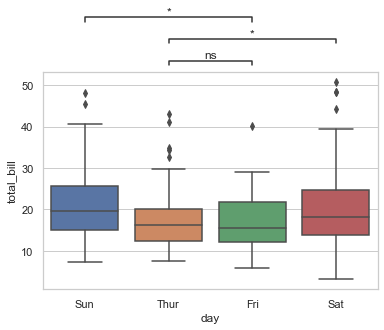

In [3]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot = Annotator(ax, [("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")], data=df, x=x, y=y, order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')

#### Statistical test results

The `annotate` method returns the tuple `ax, test_results`, where `test_results` is a list of `StatResult` objects, containing both the original data of the boxes and the statistical test results (p-value, etc).

In [4]:
for res in test_results:
    print(res)

print("\nStatResult attributes:", test_results[0].__dict__.keys())

Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02

StatResult attributes: dict_keys(['test_description', 'test_short_name', 'stat_str', 'stat_value', 'pval', '_corrected_significance', '_correction_method', 'alpha', 'box1', 'box2'])


#### Applying a multiple comparisons correction (requires `statsmodels`)
In this example, note that previously configured parameters are remembered if not changed.
This is the case for `box_pairs`, `test`, `text_format`, and `loc`.

To avoid this, you can call `annot.reset_configuration()` to get back to all default/unset values.

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.407e-01 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.041e-02 U_stat=9.605e+02


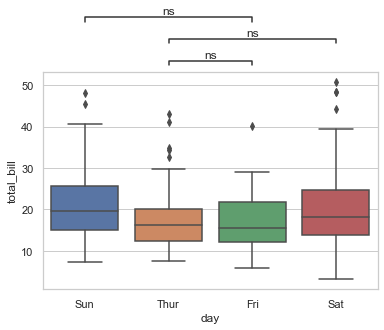

In [5]:
plotting = {
    "data": df,
    "x": x,
    "y": y,
    "order": order
}
ax = sns.boxplot(**plotting)
annot.new_plot(ax, **plotting)
annot.configure(comparisons_correction="Bonferroni", verbose=2)
test_results = annot.apply_test().annotate()

Or another

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.690e-02 (ns) U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.680e-02 (ns) U_stat=9.605e+02


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdc7039ad30>,
  <statannotations.stats.StatResult.StatResult at 0x7fdc7039a978>])

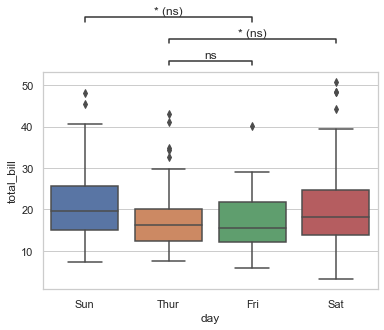

In [6]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot.new_plot(ax, data=df, x=x, y=y, order=order)
annot.configure(comparisons_correction="BH")
annot.apply_and_annotate()

#### Location

Statistical test annotation can be either drawn inside the plot area (`loc='inside'`), or on top on it (`loc='outside'`).

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sun v.s. Thur: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-01
Sun v.s. Fri: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-03
Sun v.s. Sat: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-01


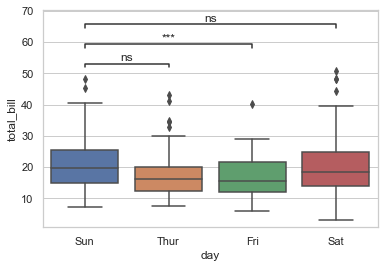

In [7]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
box_pairs=[("Sun", "Thur"), ("Sun", "Sat"), ("Fri", "Sun")]
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot.new_plot(ax, box_pairs=box_pairs, data=df, x=x, y=y, order=order)
annot.configure(test=None, loc='inside')
annot.set_pvalues([0.1, 0.1, 0.001])
annot.annotate()
plt.savefig('example_non-hue_inside.png', dpi=300, bbox_inches='tight')

### Boxplot with hue

We create boxes with unequal ymax position.

In [8]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

E_Ideal v.s. E_Premium: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.560e-31 U_stat=3.756e+06
I_Ideal v.s. I_Premium: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.141e-61 U_stat=1.009e+06
J_Ideal v.s. J_Premium: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.018e-37 U_stat=2.337e+05
E_Ideal v.s. E_Good: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.201e-19 U_stat=1.480e+06
I_Ideal v.s. I_Good: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.008e-13 U_stat=4.359e+05
J_Ideal v.s. J_Good: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.006e-04 U_stat=1.174e+05
E_Ideal v.s. E_Very Good: Mann-Whitney-Wilcoxon test two-sided with Benjamin

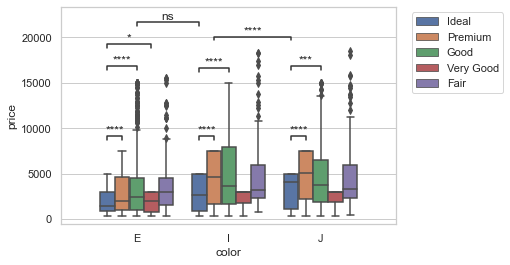

In [9]:
x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
order = ["E", "I", "J"]
box_pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.new_plot(ax, box_pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Mann-Whitney', verbose=2)
annot.apply_test()
annot.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')

### Boxplot with bucketed categories

In [10]:
df = sns.load_dataset("tips")
df['tip_bucket'] = pd.cut(df['tip'], 3)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bucket
0,16.99,1.01,Female,No,Sun,Dinner,2,"(0.991, 4.0]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(0.991, 4.0]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(0.991, 4.0]"


In [11]:
# In this case we just have to pass the list of categories objects to the annotate function.
tip_bucket_list = df['tip_bucket'].unique()
tip_bucket_list

[(0.991, 4.0], (4.0, 7.0], (7.0, 10.0]]
Categories (3, interval[float64]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Fri_(0.991, 4.0] v.s. Sat_(7.0, 10.0]: t-test independent samples, P_val:6.176e-07 t=-7.490e+00


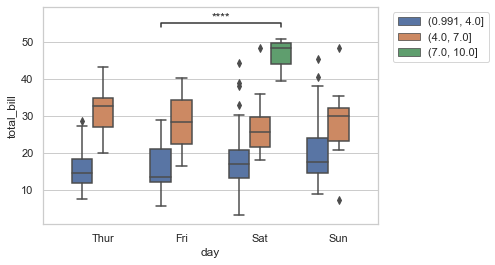

In [12]:
x = "day"
y = "total_bill"
hue = "tip_bucket"
data = df
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
# method calls can be queued
(annot
 .reset_configuration()
 .new_plot(ax, [(("Sat", tip_bucket_list[2]), ("Fri", tip_bucket_list[0]))],
           data=df, x=x, y=y, hue=hue)
 .configure(test='t-test_ind')
 .apply_test()
 .annotate())

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_bucketed.png', dpi=300, bbox_inches='tight')

### Barplot with hue

Note: Support for barplot has not been fully implemented yet.

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI2_I v.s. SI2_J: t-test independent samples, P_val:3.710e-01 t=-8.949e-01
SI1_I v.s. SI1_J: t-test independent samples, P_val:8.513e-05 t=-3.937e+00
VS1_I v.s. VS1_J: t-test independent samples, P_val:9.140e-05 t=-3.923e+00
VS2_I v.s. VS2_J: t-test independent samples, P_val:6.806e-03 t=-2.709e+00
VVS2_I v.s. VVS2_J: t-test independent samples, P_val:9.076e-14 t=-7.672e+00
VVS1_I v.s. VVS1_J: t-test independent samples, P_val:6.536e-10 t=-6.321e+00
I1_I v.s. I1_J: t-test independent samples, P_val:2.905e-02 t=-2.206e+00
IF_I v.s. IF_J: t-test independent samples, P_val:4.412e-03 t=-2.881e+00
SI1_E v.s. SI2_E: t-test independent samples, P_val:4.178e-66 t=-1.749e+01


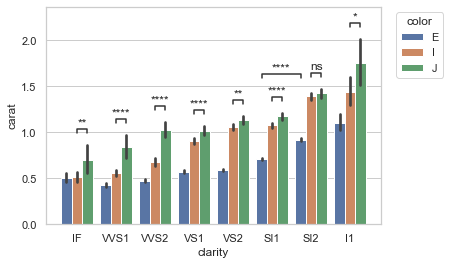

In [13]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda c: c in 'EIJ')]

x = "clarity"
y = "carat"
hue = "color"
hue_order=["E", "I", "J"]
box_pairs = [
    (("SI2", "E"), ("SI1", "E"))
    ]
box_pairs = box_pairs + [((clar, 'I'), (clar, 'J'))
                         for clar in df['clarity'].unique()]
width = 0.4
ax = sns.barplot(data=df, x=x, y=y, hue=hue, hue_order=hue_order, seed=2021)
annot.new_plot(ax, box_pairs, plot='barplot',
               data=df, x=x, y=y, hue=hue, hue_order=hue_order, seed=2021)
annot.apply_test().annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)
plt.savefig('example_barplot_hue.png', dpi=300, bbox_inches='tight')

### Tuning y offsets

![](example_tuning_y_offsets_w_arguments.png)

Sat_Yes v.s. Sat_No: t-test independent samples, P_val:4.304e-01 t=7.922e-01
Thur_No v.s. Fri_No: t-test independent samples, P_val:7.425e-01 t=-3.305e-01
Thur_Yes v.s. Sun_No: t-test independent samples, P_val:5.623e-01 t=-5.822e-01


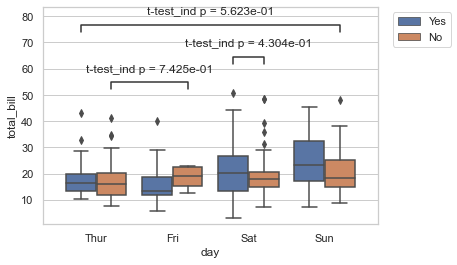

In [14]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
hue = "smoker"
box_pairs = [(("Thur", "No"), ("Fri", "No")),
             (("Sat", "Yes"), ("Sat", "No")),
             (("Sun", "No"), ("Thur", "Yes"))]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
annot.new_plot(ax, box_pairs,
               data=df, x=x, y=y, hue=hue)
annot.configure(test='t-test_ind', text_format='full', loc='inside',
                comparisons_correction=None, line_height=0.05, text_offset=8)

annot.apply_test().annotate(line_offset_to_box=0.2, line_offset=0.1)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_tuning_y_offsets.svg')
plt.savefig('example_tuning_y_offsets.png', dpi=300, bbox_inches='tight')

### Use a different test with StatTest

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: Bartlett statistical test for equal variances, P_val:8.660e-03 Stat=6.892e+00
versicolor v.s. virginica: Bartlett statistical test for equal variances, P_val:1.478e-01 Stat=2.095e+00
setosa v.s. virginica: Bartlett statistical test for equal variances, P_val:6.379e-05 Stat=1.599e+01


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdc71ab1fd0>,
  <statannotations.stats.StatResult.StatResult at 0x7fdc720f72b0>])

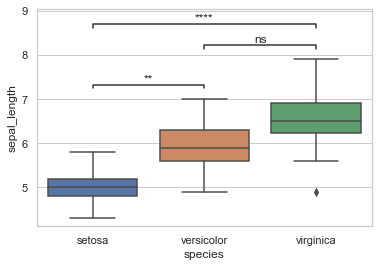

In [15]:
from statannotations.stats.StatTest import StatTest

# For example bartlett's test
from scipy.stats import bartlett

df = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

box_pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]

# Required descriptors for annotate
custom_long_name = 'Bartlett statistical test for equal variances'
custom_short_name = 'Bartlett'
custom_func = bartlett
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

# Then, same as usual
ax = sns.boxplot(data=df, x=x, y=y)
annot.reset_configuration()
annot.new_plot(ax, box_pairs, data=df, x=x, y=y)
annot.configure(test=custom_test, comparisons_correction=None,
                text_format='star').apply_test().annotate()

### Custom p-values as input
! multiple comparisons corrections will be applied if they are configured in annotator.

In [16]:
from scipy.stats import bartlett

test_short_name = 'Bartlett'
pvalues = []
for pair in box_pairs:
    data1 = df.groupby(x)[y].get_group(pair[0])
    data2 = df.groupby(x)[y].get_group(pair[1])
    stat, p = bartlett(data1, data2)
    print("Performing Bartlett statistical test for equal variances on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)

Performing Bartlett statistical test for equal variances on pair: ('setosa', 'versicolor') stat=6.89e+00 p-value=8.66e-03
Performing Bartlett statistical test for equal variances on pair: ('setosa', 'virginica') stat=1.60e+01 p-value=6.38e-05
Performing Bartlett statistical test for equal variances on pair: ('versicolor', 'virginica') stat=2.09e+00 p-value=1.48e-01
pvalues: [0.008659557933880048, 6.378941946712554e-05, 0.14778816016231236]


p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: Custom statistical test, P_val:8.660e-03
versicolor v.s. virginica: Custom statistical test, P_val:1.478e-01
setosa v.s. virginica: Custom statistical test, P_val:6.379e-05


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdc6f816ac8>,
  <statannotations.stats.StatResult.StatResult at 0x7fdc71ab1be0>])

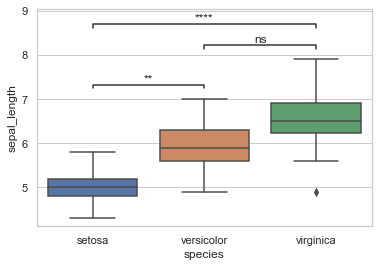

In [17]:
ax = sns.boxplot(data=df, x=x, y=y)
annot.new_plot(ax=ax, box_pairs=box_pairs,
               data=df, x=x, y=y)
(annot
 .configure(test=None, test_short_name=test_short_name)
 .set_pvalues(pvalues=pvalues)
 .annotate())

### Custom annotation texts

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



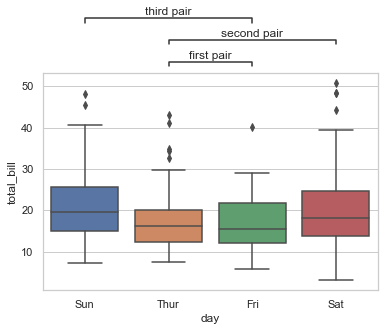

In [18]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot.new_plot(ax, box_pairs=[("Thur", "Fri"),("Thur", "Sat"), ("Fri", "Sun")],
               data=df, x=x, y=y, order=order)
annot.configure(loc='outside')
annot.set_custom_annotation(["first pair", "second pair", "third pair"])
annot.annotate()

plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')

With a log-scale swarm plot


p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

H1N1_Nonsynonymous v.s. H1N1_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:5.014e-04 U_stat=2.624e+03
H3N2_Nonsynonymous v.s. H3N2_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:1.294e-03 U_stat=1.535e+04
Influenza B_Nonsynonymous v.s. Influenza B_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:2.026e-01 U_stat=3.340e+02


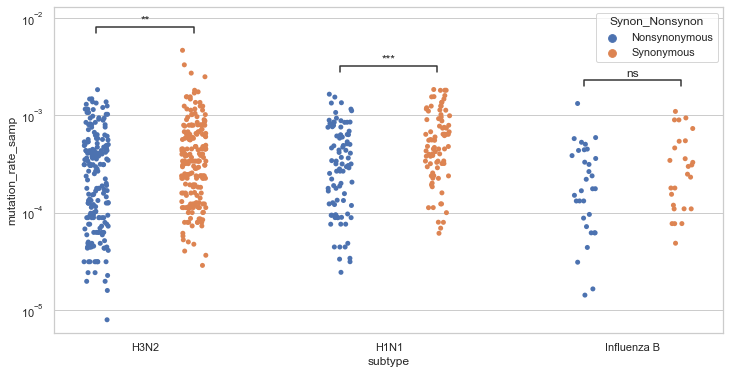

In [19]:
samples = pd.read_csv('samples.tsv', sep = '\t')
samples = samples.loc[samples.mutation_rate_samp < 1]
samples = samples.drop(columns=['mutation_rate_samp'])
samples = samples.melt(id_vars=['sampleID', 'subtype'], value_vars=['nonsynon_mutation_rate_samp','synon_mutation_rate_samp'], var_name='Synon_Nonsynon', value_name='mutation_rate_samp').replace('nonsynon_mutation_rate_samp', 'Nonsynonymous').replace('synon_mutation_rate_samp', 'Synonymous')
samples = samples.loc[samples.mutation_rate_samp > 0]

significanceComparisons = [(('H3N2','Synonymous'), ('H3N2','Nonsynonymous')),
                           (('H1N1','Synonymous'), ('H1N1','Nonsynonymous')),
                           (('Influenza B','Synonymous'), ('Influenza B','Nonsynonymous'))]

fig_args = {'x': 'subtype',
            'y': 'mutation_rate_samp',
            'hue':'Synon_Nonsynon',
            'data': samples,
            'order': ['H3N2', 'H1N1', 'Influenza B'],
            'hue_order':['Nonsynonymous','Synonymous'],
            'dodge': True}

configuration = {'test':'Mann-Whitney',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.set_yscale('log')

sns.stripplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, box_pairs=significanceComparisons,
                      **fig_args, plot='stripplot')
annotator.configure(**configuration).apply_test().annotate()
fig.savefig(f'flu_dataset_log_scale_in_axes_strip.svg', format='svg')

And a similar swarm plot, with a different format for pvalues

H1N1_Nonsynonymous v.s. H1N1_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:5.014e-04 U_stat=2.624e+03
H3N2_Nonsynonymous v.s. H3N2_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:1.294e-03 U_stat=1.535e+04
Influenza B_Nonsynonymous v.s. Influenza B_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:2.026e-01 U_stat=3.340e+02


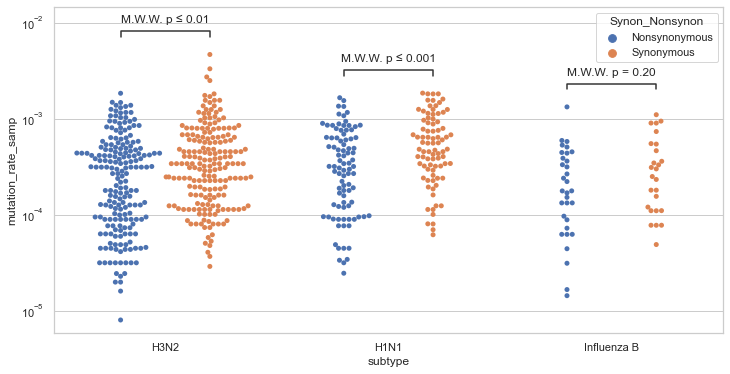

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.set_yscale('log')

sns.swarmplot(ax=ax, **fig_args)
annotator.new_plot(ax, plot='swarmplot', **fig_args)
annotator.configure(**{**configuration, "text_format":"simple", "text_offset":6})\
    .apply_test().annotate()
fig.savefig(f'flu_dataset_log_scale_in_axes.svg', format='svg')